# Deep Learning - Linear Regression - Car Prices

From Section 43: Deep Learning - How to Build a Neural Network from Scratch with NumPy
- Original file: Minimal_example_Part_4_Complete.ipynb

## Project Goal: predict the price of a used car depending on its specifications

Our data set contains a list of second hand cars with their respective specifications. Some of them are potential regressors or features (or relevant variables), such as:
- **Brand**: it is well known that a BMW is generally more expensive than a Toyota.
- **Mileage**: the more a car is driven, the cheaper it should be.
- **Engine volume**: sports cars have larger engines and economy cars have smaller engines.
- **Year of production**: the older the car, the cheaper it is. 
- **The rest are categorical variables** (Body, Engine Type, Registration and Model), which will deal with on a case by case basis.


## Importing the relevant libraries

In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [46]:
# Load the input data 
raw_data = pd.read_csv('1.04.+Real-life+example.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [47]:
raw_data.shape

(4345, 9)

## Preprocessing

### Exploring the descriptive statistics of the variables

In [48]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


<span style="color:MediumBlue">**_Observation:_** The descriptive **count** shows that each variable has a different number of observations, which implies there are some **missing values**.</span>

### Determining the variables of interest

A lot of the information from the variable Model could be engineered from Brand, Year and Engine,  so we won’t be losing too much variability if we exclude it. 

In [49]:
# we will create the regression without 'Model'
data = raw_data.drop(['Model'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

**Brand, Body, Mileage, Engine Type, Registration and Year** seem to have no missing values, given that they count the total number of observations (4345 observations), while **Price and EngineV** have less observations, so they seem to have missing values. We delete those observations (that are missing values) becuase they are less than 5%. 

**A rule of thumb**: if you are removing < 5% of the observations, you are free to just remove all observations that have missing values.


In [50]:
# data.isnull() # shows a DataFrame with True for the missing values
# Sum them up to get the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [51]:
# Let's simply drop all missing values
data_no_mv = data.dropna(axis=0)

In [52]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

- A great step in the data exploration is to display the probability distribution function (PDF) of each variable of interest or feature. 
- The PDF will show us how that variable is distributed. This makes it very easy to spot anomalies, such as outliers. 
- The PDF is often the basis on which we decide whether we want to transform a feature.

#### PDF of the Price variable

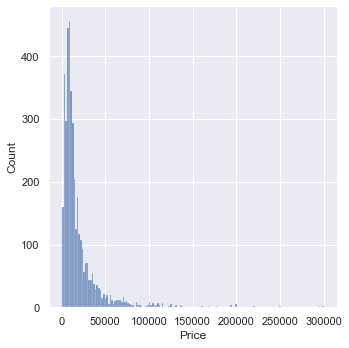

In [53]:
sns.displot(data_no_mv['Price'])

For the optimal results, we would be looking for a normal distribution,  price, however, has an exponential one. In this case, **it is right-skewed or positive skewed**. This will surely be a problem for our regression. 

Let’s analyze its descriptives of the Price variable. The mean is higher than the median (the 50% quartile) and the max value is much more higher than the 75% quartile. (Recall mean is affected by outliers). This means we have outliers in the price variable. **The outliers are situated around the higher prices (right side of the graph).**


*Note*: Outliers are observations that lie on abnormal distance from other observations in the data. They will affect the regression dramatically and cost coefficients to be inflated, as the regression will try to place the line closer to those values.



### Dealing with outliers

**Rule of thumb:**  we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples

In our case, we will remove the 1% of the problematic samples (the top 1% of observations).

In [54]:
# compute the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
# which means we remove the top 1% of the data about 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]

data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


We could see now that the maximum value was lower than the 99 percentile. While the maximum value is still far away from the mean, it is acceptably closer. And if we check the PDF of the price variable now, the data is still distributed in the same way (exponential distribution), but with less outliers:

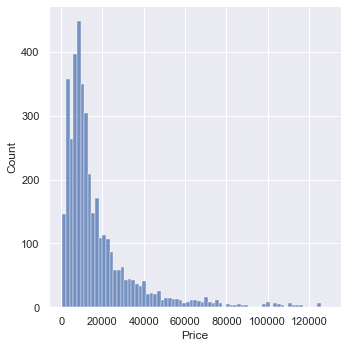

In [55]:
# check the PDF to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.displot(data_1['Price'])

#### PDF of the Mileage variable

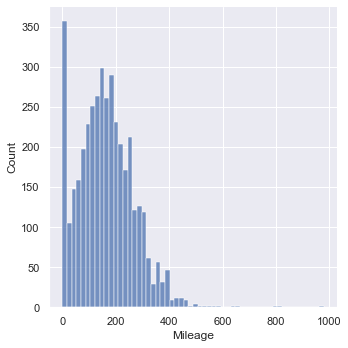

In [56]:
# We can treat the other numerical variables in a similar way
sns.displot(data_no_mv['Mileage'])

In [57]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

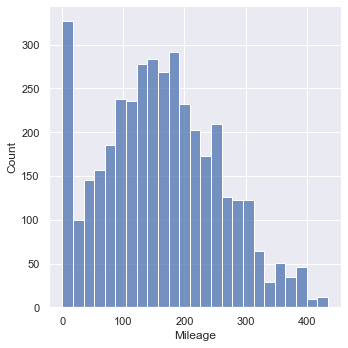

In [58]:
# This plot looks kind of normal, doesn't it?
sns.displot(data_2['Mileage'])

#### PDF of the EngineV variable

The situation with engine volume is very strange. In such cases it makes sense to manually check what may be causing the problem. In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99. There are also some incorrect entries like 75.

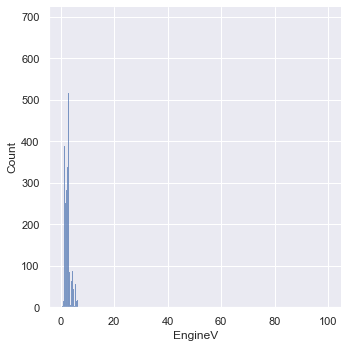

In [59]:
sns.displot(data_no_mv['EngineV'])

A quick search on Google would confirm that the interval where engine volume should fall is between 0.6 and 6.5. Therefore, those ninety nine point nine nines, 90s and so on are incorrect entries.

Here we have a benchmark (a limit) of 6.5 maximum. So, I'll keep all values that are lower than 6.5 as I know the natural domain of the engine volume values (and remove values equal or higher than 6.5):

In [60]:
# remove values higher than 6.5 
data_3 = data_2[data_2['EngineV']<6.5]

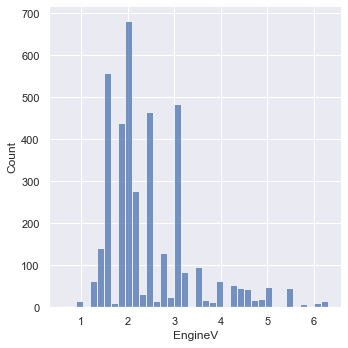

In [61]:
sns.displot(data_3['EngineV'])

#### PDF of the Year variable

The problem with the Year variable is on the low end, most cars are newer but there seem to be a few vintage cars (outliers). It is **left-skewed or negative skewed**. This time, I'll take the 1% percentile and then we'll keep all observations that are higher:

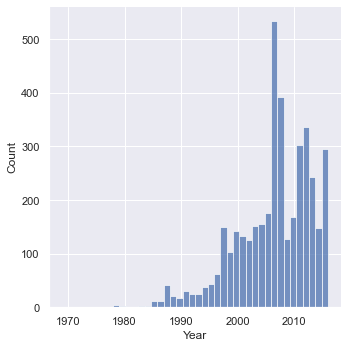

In [62]:
# the outliers are on the low end
sns.displot(data_no_mv['Year'])

In [63]:
# remove outliers (the 1% lower data)
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

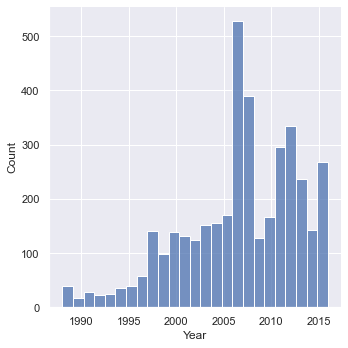

In [64]:
# Here's the new result
sns.displot(data_4['Year'])

In [65]:
# When we remove observations, the original indexes are preserved
# reset the index
data_cleaned = data_4.reset_index(drop=True)

Let's see the descriptive statistics after cleaning the input data. Overall, we've deleted around 250 observations, but they were the problematic ones. This is the correct way to clean data:

In [66]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

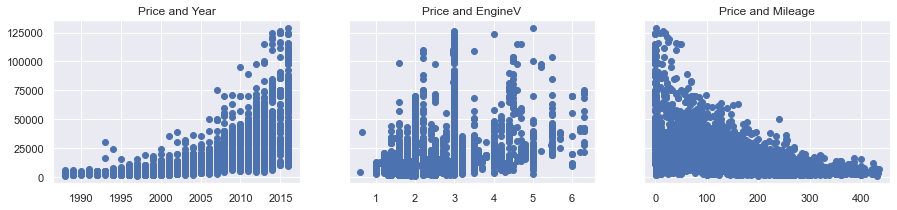

In [67]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

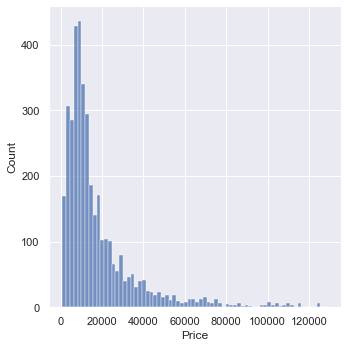

In [68]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.displot(data_cleaned['Price'])

### Relaxing the assumptions

In [69]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


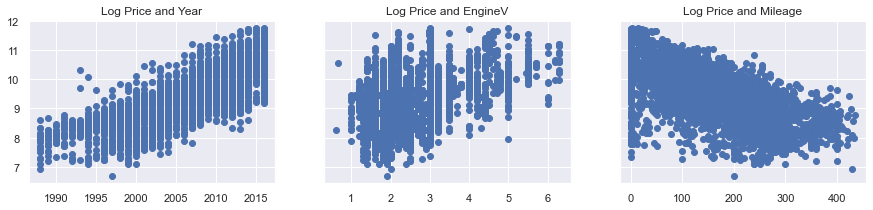

In [70]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [71]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [72]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [73]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [74]:
# Let's explore the result
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [75]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

To include the categorical data in the regression, let's create dummies

In [76]:
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [77]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

 To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df. Since each problem is different, that must be done manually.

In [78]:
# display all possible features
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [79]:
# the order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [80]:
# To implement the reordering, we will create a new df, which is equal to 
# the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [81]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable or features, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

Let’s scale our data to standarize all input variables

In [82]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [83]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

The training test will contain:
- x_train: input data (features)
- y_train: targets (real car prices)

In [84]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [85]:
inputs = x_train
inputs.shape

(3093, 17)

In [86]:
type(inputs)

numpy.ndarray

In [87]:
targets = y_train.to_numpy() #pd.DataFrame(y_train)
targets = targets.reshape(targets.shape[0], 1)
targets.shape

(3093, 1)

In [88]:
type(targets)

numpy.ndarray

### Initialize variables

In [89]:
init_range = 0.1

In [90]:
weights = np.random.uniform(low=-init_range, high=init_range, size=(17, 1))
weights.shape

(17, 1)

In [91]:
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
biases.shape

(1,)

In [92]:
print (weights)

[[ 0.01621941]
 [ 0.06259063]
 [ 0.09305747]
 [ 0.06909867]
 [-0.00847029]
 [ 0.09626565]
 [ 0.03996268]
 [-0.06693507]
 [ 0.02045393]
 [-0.02718763]
 [-0.09905877]
 [-0.068738  ]
 [ 0.04821407]
 [-0.05545736]
 [-0.06010687]
 [ 0.07325172]
 [ 0.01608411]]


In [93]:
print (biases)

[-0.06759677]


### Set the learning rate

In [94]:
learning_rate = 0.02
observations = inputs.shape[0]
observations

3093

### Train the model

In [98]:
for i in range (100):
    outputs = np.dot(inputs,weights)  + biases

    deltas = outputs - targets
        
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print (loss)
    
    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    

0.09826087936028682
0.0982413923440429
0.09822237756984775
0.09820381865001193
0.09818569982002187
0.09816800591426895
0.09815072234273173
0.09813383506857302
0.09811733058661676
0.09810119590266893
0.09808541851365028
0.09806998638850825
0.09805488794987754
0.09804011205646017
0.09802564798609618
0.09801148541949828
0.09799761442462382
0.09798402544165968
0.09797070926859514
0.09795765704736012
0.09794486025050665
0.09793231066841163
0.09792000039698077
0.09790792182583427
0.09789606762695448
0.09788443074377803
0.09787300438071499
0.09786178199307756
0.09785075727740315
0.09783992416215552
0.0978292767987896
0.09781880955316549
0.09780851699729808
0.09779839390142883
0.0977884352264074
0.09777863611637064
0.09776899189170737
0.09775949804229792
0.09775015022101717
0.09774094423749144
0.09773187605209827
0.09772294177020091
0.09771413763660665
0.09770546003024193
0.0976969054590342
0.09768847055499348
0.09768015206948531
0.0976719468686876
0.09766385192922435
0.097655864333969
0.09764

In [99]:
print (weights, biases)

[[-0.45484946]
 [ 0.2230756 ]
 [ 0.05842396]
 [ 0.05851535]
 [-0.10398323]
 [-0.14147974]
 [-0.01860879]
 [-0.03963339]
 [-0.13263719]
 [-0.08731517]
 [-0.17828241]
 [-0.10630901]
 [-0.14821546]
 [-0.11701272]
 [-0.03170687]
 [-0.1425074 ]
 [ 0.31397111]] [9.41190083]


In [100]:
outputs.shape

(3093, 1)

In [101]:
# predicted values 
outputs

array([[8.86689594],
       [9.38891907],
       [9.65770095],
       ...,
       [9.93707467],
       [7.83348392],
       [9.8198049 ]])

### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

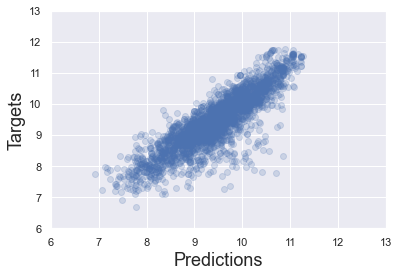

In [65]:
# We print the outputs and the targets in order to see if they have a linear relationship.
# Again, that's not needed. Moreover, in later lectures, that would not even be possible.
plt.scatter(outputs, targets, alpha=0.2)
plt.xlabel('Predictions',size=18)
plt.ylabel('Targets',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()